# Datasets

A dataset is a list of (input, target) pairs that can be further split into training and testing lists.

Let's make an example network to use as demonstration. This network will compute whether the number of 1's in a set of 5 bits is odd.

In [1]:
from conx import Network, Layer

net = Network("Odd Network")
net.add(Layer("input", 5))
net.add(Layer("hidden", 10, activation="relu"))
net.add(Layer("output", 1, activation="sigmoid"))
net.connect()
net.compile(error="mse", optimizer="adam")
net.summary()

conx, version 3.4.3
Using Theano backend.


Network Summary
---------------
Network name: Odd Network
    Layer name: 'input' (input)
        VShape: None
        Dropout: 0
        Connected to: ['hidden']
        Activation function: None
        Dropout percent: 0
    Layer name: 'hidden' (hidden)
        VShape: None
        Dropout: 0
        Connected to: ['output']
        Activation function: relu
        Dropout percent: 0
    Layer name: 'output' (output)
        VShape: None
        Dropout: 0
        Activation function: sigmoid
        Dropout percent: 0


## As a list of (input, target) pairs

The most straightforward method of adding input, target vectors to train on is to use a list of (input, target) pairs. First we define a function that takes a number and returns the bitwise representation of it:

In [2]:
def num2bin(i, bits=5):
    """
    Take a number and turn it into a list of bits (most significant first).
    """
    return [int(s) for s in (("0" * bits) + bin(i)[2:])[-bits:]]

In [3]:
num2bin(23)

[1, 0, 1, 1, 1]

Now we make a list of (input, target) pairs:

In [4]:
patterns = []

for i in range(2 ** 5):
    inputs = num2bin(i)
    targets = [int(sum(inputs) % 2 == 1.0)]
    patterns.append((inputs, targets))

Pair set 5 looks like:

In [5]:
patterns[5]

([0, 0, 1, 0, 1], [0])

We set the network to use this dataset:

In [6]:
patterns

[([0, 0, 0, 0, 0], [0]),
 ([0, 0, 0, 0, 1], [1]),
 ([0, 0, 0, 1, 0], [1]),
 ([0, 0, 0, 1, 1], [0]),
 ([0, 0, 1, 0, 0], [1]),
 ([0, 0, 1, 0, 1], [0]),
 ([0, 0, 1, 1, 0], [0]),
 ([0, 0, 1, 1, 1], [1]),
 ([0, 1, 0, 0, 0], [1]),
 ([0, 1, 0, 0, 1], [0]),
 ([0, 1, 0, 1, 0], [0]),
 ([0, 1, 0, 1, 1], [1]),
 ([0, 1, 1, 0, 0], [0]),
 ([0, 1, 1, 0, 1], [1]),
 ([0, 1, 1, 1, 0], [1]),
 ([0, 1, 1, 1, 1], [0]),
 ([1, 0, 0, 0, 0], [1]),
 ([1, 0, 0, 0, 1], [0]),
 ([1, 0, 0, 1, 0], [0]),
 ([1, 0, 0, 1, 1], [1]),
 ([1, 0, 1, 0, 0], [0]),
 ([1, 0, 1, 0, 1], [1]),
 ([1, 0, 1, 1, 0], [1]),
 ([1, 0, 1, 1, 1], [0]),
 ([1, 1, 0, 0, 0], [0]),
 ([1, 1, 0, 0, 1], [1]),
 ([1, 1, 0, 1, 0], [1]),
 ([1, 1, 0, 1, 1], [0]),
 ([1, 1, 1, 0, 0], [1]),
 ([1, 1, 1, 0, 1], [0]),
 ([1, 1, 1, 1, 0], [0]),
 ([1, 1, 1, 1, 1], [1])]

In [7]:
net.dataset.load(patterns)

In [8]:
net.dataset.summary()

Input Summary:
   count  : 32 (32 for training, 0 for testing)
   shape  : [(5,)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 32 (32 for training, 0 for testing)
   shape  : [(1,)]
   range  : (0.0, 1.0)


## Dataset.add()

You can use the default `dataset` and add one pattern at a time. Consider the task of training a network to determine if the number of inputs is even (0) or odd (1). We could add inputs one at a time:

In [9]:
net.dataset.clear()

In [10]:
net.dataset.add([0, 0, 0, 0, 1], [1])
net.dataset.add([0, 0, 0, 1, 1], [0])
net.dataset.add([0, 0, 1, 0, 0], [1])

In [11]:
net.dataset.clear()

In [12]:
for i in range(2 ** 5):
    inputs = num2bin(i)
    targets = [int(sum(inputs) % 2 == 1.0)]
    net.dataset.add(inputs, targets)

In [13]:
net.dataset.summary()

Input Summary:
   count  : 32 (32 for training, 0 for testing)
   shape  : [(5,)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 32 (32 for training, 0 for testing)
   shape  : [(1,)]
   range  : (0.0, 1.0)


In [14]:
net.dataset.inputs[13]

[0.0, 1.0, 1.0, 0.0, 1.0]

In [15]:
net.dataset.targets[13]

[1.0]

In [17]:
net.reset()

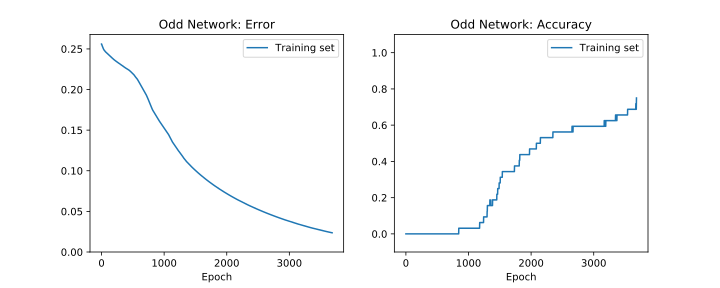

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 3683 |   0.02365 |   0.75000 


In [18]:
net.train(epochs=5000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

In [19]:
net.test(tolerance=.2)

Testing train dataset with tolerance 0.2...
Total count: 32
      correct: 24
      incorrect: 8
Total percentage correct: 0.75


## Dataset inputs and targets

Inputs and targets in the dataset are represented in the same format as given (as lists, or lists of lists). These formats are automattically converted into an internal format.

In [20]:
ds = net.dataset

In [24]:
ds.inputs[17]

[1.0, 0.0, 0.0, 0.0, 1.0]

In [22]:
net.test(tolerance=.2)

Testing train dataset with tolerance 0.2...
Total count: 32
      correct: 24
      incorrect: 8
Total percentage correct: 0.75


To see/access the internal format, use the underscore before inputs or targets. This is a numpy array. conx is designed so that you need not have to use numpy for most network operations.

In [26]:
ds._inputs[0][17]

array([ 1.,  0.,  0.,  0.,  1.], dtype=float32)

## Built-in datasets

In [27]:
from conx import Dataset

In [32]:
Dataset().get('mnist')

In [33]:
Dataset().get('cifar10')

In [34]:
Dataset().get('cifar100')

## Dataset operations

Dataset.split() will divide the dataset between training and testing sets. You can provide split an integer (to divide at a specific point), or a floating-point value, to divide by a percentage.

In [35]:
ds.split(20)

In [36]:
ds.split(.5)

In [37]:
ds.slice(10)

In [38]:
ds.shuffle()

In [39]:
ds.chop(5)

In [40]:
ds.summary()

Input Summary:
   count  : 5 (3 for training, 2 for testing)
   shape  : [(5,)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 5 (3 for training, 2 for testing)
   shape  : [(1,)]
   range  : (0.0, 1.0)


### Additional operations

These functions are subject to change to an API which is more general:

In [41]:
ds.set_targets_from_inputs()

In [42]:
ds.set_inputs_from_targets()

In [54]:
# ds.set_targets_from_labels()

In [45]:
ds.inputs.shape

[(5,)]

In [46]:
ds.inputs.reshape(0, (1, 5))

In [47]:
ds.inputs.shape

[(1, 5)]

## Dataset direct manipulation

You can also set the internal format directly, given that it is in the correct format:

* use list of columns for multi-bank inputs or targets
* use np.array(vectors) for single-bank inputs or targets

In [50]:
import numpy as np

inputs = []
targets = []

for i in range(2 ** 5):
    v = num2bin(i)
    inputs.append(v)
    targets.append([int(sum(v) % 2 == 1.0)])

net = Network("Even?", 5, 2, 2, 1)
net.compile(error="mse", optimizer="adam")
net.dataset.load_direct([np.array(inputs)], [np.array(targets)])

In [51]:
net.test(tolerance=.2)

Testing train dataset with tolerance 0.2...
Total count: 32
      correct: 14
      incorrect: 18
Total percentage correct: 0.4375
